# CAS KAGGLE POKEMON

El primer que fem es importar les llibreries necesàries i la nostra base de dades, que en aquest cas tracta sobre pokemon.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

dataset = pd.read_csv(r"C:\Users\marcm\Downloads\pokemon.csv")


Ara mostrarem algunes de les dades per poder entendre millor que estem buscant, i altres dades informatives per veure si tenim algun problema previ, com per exemple nulls o variables continues

In [2]:
pd.set_option('display.max_columns', None)
dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [3]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


Despres de veure una mica les dades observem que la nostra variable objectiu sera is_legendary, es a dir volem predir si un pokemon es o no legendary.

A més hem pogut veure que tenim valors nulls, principalment a la variable de type2, aixo es degut a que alguns pokemons només tenen 1 tipus, per tant el segon es null.

In [4]:
dataset.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Aqui podem veure el comentat anteriorment, la variable type2 te molts nulls, pero son necesaris.

En canvi veiem que també tenim nulls a les variables weight_kg i height_m. Aquests si que els considerem error, per tant eliminarem les files respectives. Pero primer transformarem els nulls de la variable type2 en 0.

In [5]:
dataset = dataset.fillna({'type2': 0})

Amb aquesta funcio hem transformat els nulls de la variable type2 en 0, per tant ara podrem eliminar les files que tinguin un null en altres variables.

In [6]:
dataset['type2'].isnull().sum()

0

Observem que la variable type2 ara te 0 valors a null, per tant podem eliminar la resta de files amb nulls.

In [7]:
dataset = dataset.dropna()
dataset.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

Observem que ja no hi ha nulls, per tant podem continuar treballant amb la BD.

Ara, com hem vist que hi ha variables que son strings, els transformarem en ints per poder treballar amb més facilitat

In [8]:
dataset['capture_rate'] = dataset['capture_rate'].astype(int)

Continuem observant les correlacions

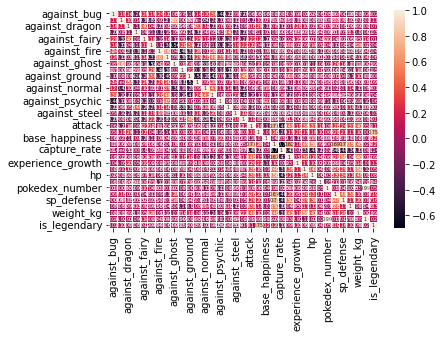

In [9]:
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5 ,annot_kws={'fontsize':5})

Com d'aquesta manera no es veuen bé les correlacións les representare d'una altra manera

<Figure size 5760x72 with 0 Axes>

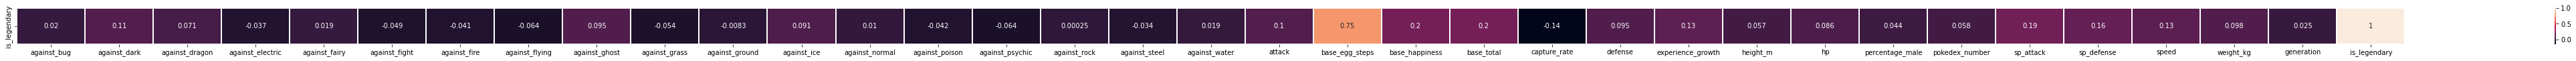

In [10]:
correlacions = dataset.corr()['is_legendary'].to_frame().T 
plt.figure(figsize=(80,1))
plt.subplots(figsize=(80, 1))
sns.heatmap(correlacions, linewidths=0.3, annot=True)
plt.show()

D'aquestes correlacions podem deduir i descartar moltes coses. 

La principal idea que veiem es que la variable que te una correlació més important amb el nostre objectiu es base_egg_steps, amb una correlació del 75%.

També veiem que hi ha moltes variables que no té sentit relacionarles amb la nostra variable objectiu is_legendary, com és el cas de les variables name, japanese_name, generation i pokedex_number entre d'altres, ja que es informació única de cada pokemon, no tenen relació en si es legendari o no, i aixó es pot veure reflectit en les correlacions tan baixes que representen. 

Amés podem descartar variables com per exemple tots els against_X, ja que es pot veure que tenen una  correlacio molt petita, fins i tot <0, i es normal ja que aquestes variables son en funció del tipus del pokemon, i un pokemon legendary pot ser de qualsevol tipus. 

Per tant procedim a eliminar les variables innecesaries.

In [11]:
dataset = dataset.drop(['against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water','capture_rate','percentage_male','pokedex_number','name','japanese_name','generation'],axis = 1)
dataset = dataset.drop(['abilities','classfication','type1','type2'],axis = 1)
dataset.head(10)

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,49,5120,70,318,49,1059860,0.7,45,65,65,45,6.9,0
1,62,5120,70,405,63,1059860,1.0,60,80,80,60,13.0,0
2,100,5120,70,625,123,1059860,2.0,80,122,120,80,100.0,0
3,52,5120,70,309,43,1059860,0.6,39,60,50,65,8.5,0
4,64,5120,70,405,58,1059860,1.1,58,80,65,80,19.0,0
5,104,5120,70,634,78,1059860,1.7,78,159,115,100,90.5,0
6,48,5120,70,314,65,1059860,0.5,44,50,64,43,9.0,0
7,63,5120,70,405,80,1059860,1.0,59,65,80,58,22.5,0
8,103,5120,70,630,120,1059860,1.6,79,135,115,78,85.5,0
9,30,3840,70,195,35,1000000,0.3,45,20,20,45,2.9,0


<Figure size 5760x108 with 0 Axes>

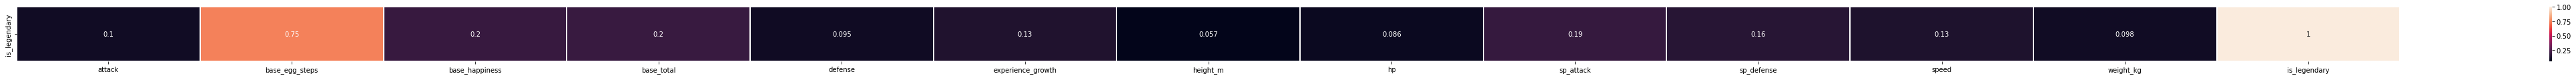

In [12]:
correlacions = dataset.corr()['is_legendary'].to_frame().T 
plt.figure(figsize=(80,1.5))
plt.subplots(figsize=(80, 1.5))
sns.heatmap(correlacions, linewidths=0.3, annot=True)
plt.show()

Ara podem observar que ens hem quedat amb aquelles variables que mes afecten a la nostra variable objectiu.

El següent pas a fer és normalitzar les variables, ja que hi ha algunes que poden tenir uns valors molt dispersos.

In [13]:
datasetNormalitzat = preprocessing.normalize(dataset)

# Models

El primer que hem de fer avanç de començar a fer models es dividir la nostra BD en train i test, utilitzarem un 80% de les dades per el train i el 20% restant per el test

In [ ]:
variableObjectiu = datasetNormalitzat['is_legendary']
train, test, objectiuTrain, objectiuTest = train_test_split(datasetNormalitzat, varialbleObjectiu, train_size=0.8)